In [1]:
import matplotlib.pyplot as plt
import networkx
import os
from bindiff import BinDiff

In [2]:
def diff_knowledge_base(sample, folder):
    """This function iterates through the files in the given knowledge base folder and performs 
    BinDiff on each file against the .BinExport sample, returning all the similarity/confidence scores. 
    The knowledge base file is considered primary program, while the sample is considered secondary."""
    scores = {}
    knowledge_base = os.path.join("knowledge_base", str.lower(folder))
    print(f"Knowledge base folder: {knowledge_base}")
    if not os.path.exists(knowledge_base):
        print(f"Folder {folder} does not exist in knowledge_base/.")
        return scores
    for entry in os.scandir(knowledge_base):
        if entry.is_file() and entry.name.endswith(".BinExport"):
            # print(f"Sample vs. KB: {sample} vs {entry.path}")
            bindiff_test = BinDiff.from_binexport_files(entry.path, sample, "test.BinDiff", override=True)
            scores[entry.name] = {"Similarity": bindiff_test.similarity, "Confidence": bindiff_test.confidence}
    return scores
# print("Scores: ", scores)

In [35]:
# 1.0.2u
sample = "samples/libcrypto/libcrypto-ax55.so.1.0.0.BinExport"

test = diff_knowledge_base(sample, "libcrypto")
print("Scores: ", test)

Knowledge base folder: knowledge_base\libcrypto
Scores:  {'libcrypto-1.0.2d.so.1.0.0.BinExport': {'Similarity': 0.39, 'Confidence': 0.65}, 'libcrypto-sdk-armvirt32-musl-1.0.2u.so.1.0.0.BinExport': {'Similarity': 0.882, 'Confidence': 0.982}, 'libcrypto-sdk-ipx4xx-uclibc-1.0.2j.so.1.0.0.BinExport': {'Similarity': 0.755, 'Confidence': 0.937}, 'libcrypto-sdk-ixp4xx-uclibc-1.0.2d.so.1.0.0.BinExport': {'Similarity': 0.743, 'Confidence': 0.934}, 'libcrypto-sdk-kirkwood-uclibc-1.0.2u.so.1.0.0.BinExport': {'Similarity': 0.776, 'Confidence': 0.942}}


In [4]:
# bindiff = BinDiff.from_binexport_files("knowledge_base/libssl/libssl-sdk-armvirt32-musl-1.0.2u.so.1.0.0.BinExport", "samples/libssl/libssl-ax55.so.1.0.0.BinExport", "output-ssl.BinDiff")
# bindiff = BinDiff("libssl-sdk-armvirt32-musl-1.0.2u.so.1.0.0.BinExport", "libssl-ax55-1.0.2u.so.1.0.0.BinExport", "output-ssl.BinDiff")

bindiff = BinDiff.from_binexport_files("knowledge_base/libcrypto/libcrypto-sdk-armvirt32-musl-1.0.2u.so.1.0.0.BinExport", "samples/libcrypto/libcrypto-ax55.so.1.0.0.BinExport", "output-libcrypto.BinDiff")
# bindiff = BinDiff("knowledge_base/libcrypto/libcrypto-sdk-armvirt32-musl-1.0.2u.so.1.0.0.BinExport", "samples/libcrypto/libcrypto-ax55.so.1.0.0.BinExport", "output-libcrypto.BinDiff")

# LibSSL

In [7]:
print("Similarity score: ", bindiff.similarity)

Similarity score:  0.828


In [8]:
def print_function_blocks(function, program) -> str:
    """This method prints the blocks of the input function in the primary or secondary program."""
    try:
        if program.lower() == "primary":
            func = bindiff.primary.fun_names[function]
        elif program.lower() == "secondary":
            func = bindiff.secondary.fun_names[function]
        else:
            raise ValueError("Program must be 'primary' or 'secondary'.")
        print(f"Function {function} found in {program} program: {func}")
        if not func.blocks:
            print(f"Function {function} has no blocks.")
        else:
            for block in func.blocks.values():
                print(block)
    except KeyError:
        print(f"Function {function} not found in {program} program.")

In [34]:

# print(diff.primary_functions_match)
# print(diff.function_matches)

# print("diff: ", type(bindiff))
# print("function matches: ", type(bindiff.function_matches))
# print("function: "type(diff.functions))
# print(diff.iter_basicblock_matches())

# print(diff.iter_function_matches)

## Unmatched (missing) functions from either program

In [ ]:

primary_unmatched = bindiff.primary_unmatched_function()
print("Primary unmatched functions:", len(primary_unmatched))
for func in primary_unmatched:
    print(func.name)



Primary unmatched functions: 6
__PLT_HEAD
__cxa_finalize
BIO_callback_ctrl
__stack_chk_fail
OBJ_ln2nid
__register_frame_info


In [7]:

secondary_unmatched = bindiff.secondary_unmatched_function()
print("Secondary unmatched functions:", len(secondary_unmatched))
for func in secondary_unmatched:
    print(func.name)

Secondary unmatched functions: 42
_DT_INIT
raise
COMP_expand_block
OBJ_sn2nid
COMP_compress_block
COMP_zlib
COMP_CTX_free
OBJ_ln2nid
EC_curve_nist2nid
strchr
sub_1F9C8
_FINI_0
SSLv2_method
SSLv2_client_method
SSLv2_server_method
sub_30FB4
sub_31084
tls1_process_heartbeat
tls1_heartbeat
dtls1_process_heartbeat
dtls1_heartbeat
sub_3D658
sub_44160
sub_4E15C
sub_4E204
sub_4E224
sub_4E22C
sub_4E300
_DT_FINI
raise
COMP_expand_block
OBJ_sn2nid
_ITM_deregisterTMCloneTable
COMP_compress_block
COMP_zlib
COMP_CTX_free
OBJ_ln2nid
EC_curve_nist2nid
__gmon_start__
strchr
COMP_CTX_new
_ITM_registerTMCloneTable


In [12]:
print_function_blocks("SSLv2_server_method", "secondary")

Function SSLv2_server_method found in secondary program: <FunctionBinExport: 0x1faa8>
mov r0, #0x0
bx lr


In [ ]:
print_function_blocks("tls1_heartbeat", "secondary")
# print_function_blocks("tls1_process_heartbeat", "secondary")

Function tls1_heartbeat found in secondary program: <FunctionBinExport: 0x35258>
stmdb sp!,{r0,r1,r2,r3,r4,r5,r6,r7,r8,lr}
ldr r7, [r0,#0x184]
and r7, r7, #0x3
cmp r7, #0x1
movne r3, #0x0
movwne r2, 0x16d
strne r3, [sp,#0x0]
bne LAB_000352b8
ldr r3, [r0,#0x188]
cpy r5, r0
cmp r3, #0x0
movne r3, #0x0
movwne r2, 0x16e
strne r3, [sp,#0x0]
bne LAB_000352b8
bl SSL_state
tst r0, #0x3000
bne LAB_000352ac
ldr r6, [r5,#0x1c]
cmp r6, #0x0
beq LAB_000352cc
mov r2, #0xf4
mov r3, #0x0
str r3, [sp,#0x0]
movw r1, 0x13b
mov r0, #0x14
bl ERR_put_error
mvn r6, #0x0
b LAB_00035344
ldr r1, [DAT_000353c0]
movw r2, 0x102c
mov r0, #0x25
add r1, pc, r1
bl CRYPTO_malloc
subs r4, r0, #0x0
beq LAB_000352c4
mov r3, #0x12
strb r7, [r4,#0x0]
strb r6, [r4,#0x1]
mov r1, #0x10
strb r3, [r4,#0x2]
add r0, r4, #0x5
ldr r3, [r5,#0x18c]
mov r3, r3, lsr #0x8
strb r3, [r4,#0x3]
ldr r3, [r5,#0x18c]
strb r3, [r4,#0x4]
bl RAND_bytes
cmp r0, #0x0
bgt LAB_00035350
mov r3, #0x0
mvn r6, #0x0
mov r2, #0x44
movw r1, 0x13b
mov r0, #0x

In [10]:
print_function_blocks("tls1_process_heartbeat", "secondary")

Function tls1_process_heartbeat found in secondary program: <FunctionBinExport: 0x350d4>
stmdb sp!,{r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,lr}
cpy r5, r0
ldr r4, [r0,#0x64]
ldr r3, [r0,#0x58]
cmp r4, #0x0
ldr r10, [r3,#0x118]
beq LAB_00035118
ldr r2, [r0,#0x68]
str r0, [sp,#local_2c]
str r2, [sp,#local_28]
mov r2, #0x18
ldr r3, [r3,#0x110]
str r3, [sp,#0x0]
cpy r3, r10
ldr r1, [r0,#0x0]
mov r0, #0x0
blx r4
ldr r3, [r5,#0x58]
ldr r3, [r3,#0x110]
cmp r3, #0x12
bls LAB_0003524c
ldrh r4, [r10,#0x1]
rev16 r4, r4
uxth r4, r4
add r9, r4, #0x13
cmp r3, r9
bcc LAB_0003524c
ldrb r8, [r10,#0x0]
cmp r8, #0x1
bne LAB_00035214
ldr r1, [DAT_00035254]
movw r2, 0xfd4
cpy r0, r9
add r1, pc, r1
bl CRYPTO_malloc
subs r6, r0, #0x0
beq LAB_000351ac
mov r3, #0x2
add r7, r6, #0x3
strb r3, [r6,#0x0]
mov r3, r4, lsr #0x8
cpy r2, r4
strb r4, [r6,#0x2]
add r1, r10, #0x3
strb r3, [r6,#0x1]
cpy r0, r7
bl memcpy
mov r1, #0x10
add r0, r7, r4
bl RAND_bytes
cmp r0, #0x0
bgt LAB_000351b4
cpy r0, r6
bl CRYPTO_free
mvn r0, #0x

## Check if there's any unmatched function with the same name

In [8]:
# common_unmatched = list(set(primary_unmatched) & set(secondary_unmatched))
# print(set(primary_unmatched))
primary_unmatched_names = {func.name for func in primary_unmatched}
secondary_unmatched_names = {func.name for func in secondary_unmatched}

common_unmatched = list(primary_unmatched_names & secondary_unmatched_names)
print("Common unmatched functions:")
for func in common_unmatched:
    print(func)

Common unmatched functions:
OBJ_ln2nid


In [50]:
print_function_blocks("OBJ_ln2nid", "primary")
print_function_blocks("OBJ_ln2nid", "secondary")


Function OBJ_ln2nid found in primary program: <FunctionBinExport: 0x621ec>
Function OBJ_ln2nid has no blocks.
Function OBJ_ln2nid found in secondary program: <FunctionBinExport: 0x65204>
Function OBJ_ln2nid has no blocks.


# Libcrypto

In [6]:
print("Similarity score: ", bindiff.similarity)

Similarity score:  0.882


## Unmatched (missing) functions from either program

In [7]:

primary_unmatched = bindiff.primary_unmatched_function()
print("Primary unmatched functions:", len(primary_unmatched))
for func in primary_unmatched:
    print(func.name)



Primary unmatched functions: 10
sub_8B53C
sub_B0558
sub_D70D0
sub_D73EC
sub_E1AD4
__deregister_frame_info
htonl
__register_frame_info
recvfrom
isalnum


In [8]:

secondary_unmatched = bindiff.secondary_unmatched_function()
print("Secondary unmatched functions:", len(secondary_unmatched))
for func in secondary_unmatched:
    print(func.name)

Secondary unmatched functions: 146
_DT_INIT
raise
sub_51F9C
sub_52018
sub_55C74
sub_587C8
SHA_Transform
SHA_Init
SHA
sub_5FD24
WHIRLPOOL_Init
WHIRLPOOL_Update
WHIRLPOOL_Final
WHIRLPOOL
whirlpool_block
SEED_set_key
SEED_encrypt
SEED_decrypt
SEED_ecb_encrypt
SEED_cbc_encrypt
SEED_cfb128_encrypt
SEED_ofb128_encrypt
sub_72BB4
bn_mul_high
bn_mul_low_recursive
bn_sqr_recursive
BN_GF2m_add
BN_GF2m_mod_arr
BN_GF2m_mod_sqr_arr
BN_GF2m_mod_mul_arr
BN_GF2m_mod_sqrt_arr
BN_GF2m_poly2arr
BN_GF2m_mod
BN_GF2m_mod_div
BN_GF2m_mod_solve_quad
BN_GF2m_arr2poly
BN_GF2m_mod_inv_arr
BN_GF2m_mod_div_arr
EC_GROUP_set_curve_GF2m
EC_GROUP_get_curve_GF2m
EC_POINT_get_affine_coordinates_GF2m
EC_GROUP_new_curve_GF2m
EC_GROUP_get_pentanomial_basis
ec_GF2m_simple_points_make_affine
ec_GF2m_simple_group_init
ec_GF2m_simple_group_finish
ec_GF2m_simple_point_finish
ec_GF2m_simple_group_clear_finish
ec_GF2m_simple_group_set_curve
ec_GF2m_simple_group_get_degree
ec_GF2m_simple_group_check_discriminant
ec_GF2m_simple_poin

## Check if there's any unmatched function with the same name

In [9]:
# common_unmatched = list(set(primary_unmatched) & set(secondary_unmatched))
# print(set(primary_unmatched))
primary_unmatched_names = {func.name for func in primary_unmatched}
secondary_unmatched_names = {func.name for func in secondary_unmatched}

common_unmatched = list(primary_unmatched_names & secondary_unmatched_names)
print("Common unmatched functions:")
for func in common_unmatched:
    print(func)

Common unmatched functions:


## Set a target function

In [4]:
func_name = "X509_verify_cert"
# func_name = "sub_99774"

## Checking if an arbitrary function exists and if it's matched 

In [5]:
# func_name = "sub_99774"
# func_name = "X509_verify_cert"
print(bindiff.primary.fun_names)
# if func_name in bindiff.primary.fun_names:
#     print(f"Function {func_name} found in primary functions.")
print(type(bindiff.primary.fun_names))

# print(bindiff.primary.fun_names[func_name])

# Check if target function exists in primary functions
try:
    primary_func = bindiff.primary.fun_names[func_name]
    print(f"Primary function for {func_name}: {primary_func}")
    # Check if the function is matched
    if bindiff.is_matched(primary_func):
        print(f"Function {func_name} is matched.")
        match = bindiff.get_match(primary_func)
        print(f"Match details for {primary_func}: {match}")
        # match[0] == bindiff.secondary.fun_names[match[1].name2]
        # print(match[0] == bindiff.secondary.fun_names[match[1].name2])
        secondary_func = match[0]
        print(f"Secondary function for {func_name}: {secondary_func}")
        match_secondary = bindiff.get_match(secondary_func)
        print(f"Match details for {secondary_func}: {match_secondary}")
        # networkx.draw(primary_func.graph, with_labels=True, node_size=10, font_size=8)
        # plt.show()
        # networkx.draw(secondary_func.graph, with_labels=True, node_size=10, font_size=8)
        # plt.show()
    else:
        print(f"Function {func_name} is not matched.")
except KeyError:
    print(f"Function {func_name} not found in primary functions.")

# print(bindiff.primary_unmatched_function())

print(primary_func.blocks)


{'_init': <FunctionBinExport: 0x491fc>, '__PLT_HEAD': <FunctionBinExport: 0x49208>, 'printf': <FunctionBinExport: 0x13f000>, 'memmove': <FunctionBinExport: 0x13f008>, 'dlopen': <FunctionBinExport: 0x13f00c>, '__cxa_finalize': <FunctionBinExport: 0x13f010>, 'fread': <FunctionBinExport: 0x13f014>, 'sigprocmask': <FunctionBinExport: 0x13f018>, 'fgets': <FunctionBinExport: 0x13f01c>, 'close': <FunctionBinExport: 0x13f020>, 'feof': <FunctionBinExport: 0x13f024>, 'sigfillset': <FunctionBinExport: 0x13f028>, 'strchr': <FunctionBinExport: 0x13f02c>, 'siglongjmp': <FunctionBinExport: 0x13f030>, 'strncmp': <FunctionBinExport: 0x13f034>, 'htons': <FunctionBinExport: 0x13f038>, 'fputc': <FunctionBinExport: 0x13f03c>, 'strrchr': <FunctionBinExport: 0x13f040>, 'stat': <FunctionBinExport: 0x13f044>, 'ntohs': <FunctionBinExport: 0x13f048>, 'free': <FunctionBinExport: 0x13f04c>, 'fputs': <FunctionBinExport: 0x13f050>, 'abort': <FunctionBinExport: 0x13f054>, 'getegid': <FunctionBinExport: 0x13f058>, 'ff

In [6]:
GM = networkx.algorithms.isomorphism.DiGraphMatcher(primary_func.graph, secondary_func.graph)
is_isomorphic = GM.is_isomorphic()
print(f"Are graphs isomorphic? --> {is_isomorphic}")
mapping = GM.mapping

Are graphs isomorphic? --> False


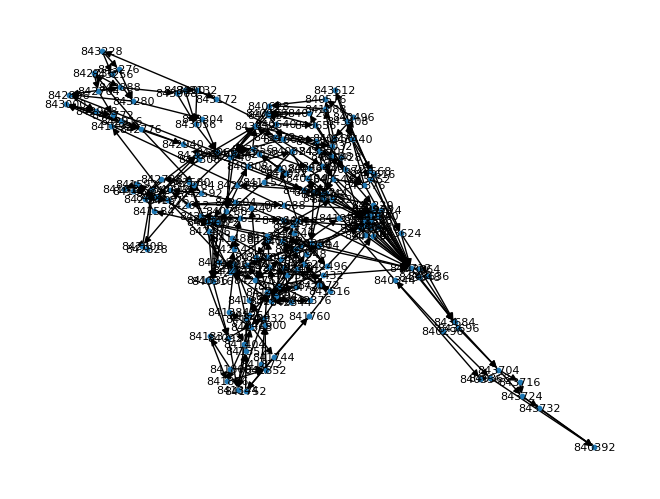

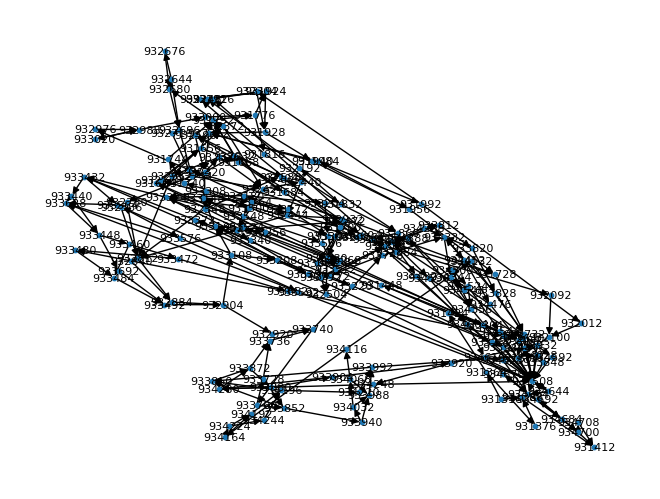

In [7]:
# Graph is inconsistent due to having no defined structure
networkx.draw(primary_func.graph, with_labels=True, node_size=10, font_size=8)
plt.show()
networkx.draw(secondary_func.graph, with_labels=True, node_size=10, font_size=8)
plt.show()

## Basic block / Instruction level analysis for the found match

In [ ]:
bb_matches = bindiff.iter_basicblock_matches(primary_func, secondary_func)
print(bb_matches)
# bb_matches has the shape of [(primary_matched_block:address, secondary_matched_block:address, BasicBlockMatch(..., functionMatch, ...)), ...]
# Printing the block prints the instructions of the block
print(bb_matches[0][2].function_match.similarity)

n_matched_neq_blocks = 0
matched_neq_blocks = []
# lowest_similarity = 1.0
# lowest_sim_match = None

print(bb_matches[0][0].instructions)
print(list(bb_matches[0][0].instructions.values())[0].mnemonic)
print(list(bb_matches[0][0].instructions.values())[0].operands)

# for index, match in enumerate(bb_matches):
    
    # match[0] is the primary block, match[1] is the secondary block, match[2] is the BasicBlockMatch
    # match[2].function_match.similarity is the similarity of the function match
    # match[2].function_match.primary_function is the primary function
    # match[2].function_match.secondary_function is the secondary function
primary_matched_b = 0
secondary_matched_b = 0
branch_instructions = {
    # ARM unconditional
    "b", "bl", "bx", "blx", "bxj",
    # ARM conditional (b + condition)
    "beq", "bne", "bgt", "blt", "bge", "ble",
    "bcs", "bcc", "bhs", "blo",
    "bmi", "bpl", "bvs", "bvc",
    "bhi", "bls",
    # ARM compare/test branches (Thumb-2)
    "cbz", "cbnz", "tbz", "tbnz",
}


for match in bb_matches:
    # match has the shape of (primary_matched_block:address, secondary_matched_block:address, BasicBlockMatch(..., functionMatch, ...))
    # Get a list of instructions from the primary and secondary blocks of the match
    primary_instr = list(match[0].instructions.values())
    secondary_instr = list(match[1].instructions.values())

    # Get branch instructions from the primary and secondary matches
    for instr in primary_instr:
        if instr.mnemonic in branch_instructions:
            # print(f"Primary block branch instruction: {instr.mnemonic} {instr.operands}")
            primary_matched_b += 1
    for instr in secondary_instr:
        if instr.mnemonic in branch_instructions:
            # print(f"Secondary block branch instruction: {instr.mnemonic} {instr.operands}")
            secondary_matched_b += 1

    # Check if the number of instructions in the primary and secondary blocks match
    if len(primary_instr) != len(secondary_instr):
        print(f"Matched block instruction count mismatch: {len(primary_instr)} vs {len(secondary_instr)}, with algorithm {match[2].algorithm}")
        print(f"Match: {match}")
        print(f"Primary block: {match[0]}")
        print(f"Secondary block: {match[1]}\n")
        


        
#     if match[0] != match[1]:
#         print(f"Basic block non-exact match: {match[0]} -> {match[1]}")

# print(primary_instr)
# print(secondary_instr)
print(f"Primary matched blocks branch instructions: {primary_matched_b}")
print(f"Secondary matched blocks branch instructions: {secondary_matched_b}")
    # if match[2].function_match.similarity < 1.0:
    #     n_matched_neq_blocks += 1
    #     matched_neq_blocks.append(match)
    #     if match[2].function_match.similarity < lowest_similarity:
    #         lowest_similarity = match[2].function_match.similarity
    #         lowest_sim_match = match
        # print(f"Basic block match: {match[0]} -> {match[1]} with similarity {match[2].function_match.similarity}")

# print(f"Number of matched blocks with similarity < 1.0: {n_matched_neq_blocks}")
# print(f"Matched blocks with similarity < 1.0: {matched_neq_blocks}")
# print(f"Lowest similarity of matched blocks: {lowest_similarity}")
# print(f"Lowest similarity match:\n  {lowest_sim_match[0]} ->\n  {lowest_sim_match[1]} \nwith similarity {lowest_sim_match[2].function_match.similarity}")

[(<BasicBlockBinExport:0xcd268>, <BasicBlockBinExport:0xe35f4>, BasicBlockMatch(id=20040, function_match=FunctionMatch(id=2712, address1=840296, name1='X509_verify_cert', address2=931316, name2='X509_verify_cert', similarity=0.9498893891147882, confidence=0.9849079248564541, algorithm=<FunctionAlgorithm.name_hash_matching: 1>), address1=840296, address2=931316, algorithm=<BasicBlockAlgorithm.edges_prime_product: 1>)), (<BasicBlockBinExport:0xcd298>, <BasicBlockBinExport:0xe3624>, BasicBlockMatch(id=20041, function_match=FunctionMatch(id=2712, address1=840296, name1='X509_verify_cert', address2=931316, name2='X509_verify_cert', similarity=0.9498893891147882, confidence=0.9849079248564541, algorithm=<FunctionAlgorithm.name_hash_matching: 1>), address1=840344, address2=931364, algorithm=<BasicBlockAlgorithm.edges_prime_product: 1>)), (<BasicBlockBinExport:0xcd2a4>, <BasicBlockBinExport:0xe3630>, BasicBlockMatch(id=20042, function_match=FunctionMatch(id=2712, address1=840296, name1='X509_v

In [ ]:
# print(list(bb_matches[0][0].instructions.values())
print(bindiff.primary_unmatched_basic_block(primary_func))
print(len(bindiff.primary_unmatched_basic_block(primary_func)))
for mismatch in bindiff.primary_unmatched_basic_block(primary_func):
    print("Mismatch:\n")
    print(mismatch)

print(bindiff.secondary_unmatched_basic_block(secondary_func))
print(len(bindiff.secondary_unmatched_basic_block(secondary_func)))
for mismatch in bindiff.secondary_unmatched_basic_block(secondary_func):
    print(mismatch)


[<BasicBlockBinExport:0xcd3fc>, <BasicBlockBinExport:0xcd510>, <BasicBlockBinExport:0xcd5f8>]
3
Mismatch:

mov r3, #0x42
str r11, [sp,#local_50]
str r3, [r4,#0x64]
Mismatch:

mov r3, #0x42
str r3, [r4,#0x64]
b LAB_000cd408
Mismatch:

ldr r0, [r4,#0x54]
sub r8, r5, #0x1
sub r7, r7, #0x1
bl sk_pop
ldr r3, [r4,#0x50]
sub r1, r5, #0x2
str r0, [sp,#local_50]
ldr r0, [r4,#0x54]
cpy r5, r8
sub r3, r3, #0x1
str r3, [r4,#0x50]
bl sk_value
cpy r6, r0
b LAB_000cd4d4
[<BasicBlockBinExport:0xe3904>]
1
mov r2, #0x41
mov r1, #0x7f
mov r0, #0xb
bl ERR_put_error
mov r3, #0x11
str r3, [r4,#0x64]
b LAB_000e36b0


Secondary block: ldr r0, [r4,#0x54]
sub r9, r6, #0x1
bl sk_pop
ldr r3, [r4,#0x50]
sub r1, r6, #0x2
cpy r5, r0
ldr r0, [r4,#0x54]
sub r8, r8, #0x1
cpy r6, r9
sub r3, r3, #0x1
str r3, [r4,#0x50]
bl sk_value
cpy r7, r0
b LAB_000e3854

### Using primary/secondary_unmatched_instruction (no full picture of the matched basic blocks)

In [9]:
bb_matches = bindiff.iter_basicblock_matches(primary_func, secondary_func)
print(bb_matches)
# bb_matches has the shape of [(primary_block:address, secondary_block:address, BasicBlockMatch(..., functionMatch, ...)), ...]
# Printing the block prints the instructions of the block
print(bb_matches[0][2].function_match.similarity)

n_matched_neq_blocks = 0
matched_neq_blocks = []
# lowest_similarity = 1.0
# lowest_sim_match = None

print(bb_matches[0][0].instructions)
print(list(bb_matches[0][0].instructions.values())[0].mnemonic)
print(list(bb_matches[0][0].instructions.values())[0].operands)

# for index, match in enumerate(bb_matches):
    
    # match[0] is the primary block, match[1] is the secondary block, match[2] is the BasicBlockMatch
    # match[2].function_match.similarity is the similarity of the function match
    # match[2].function_match.primary_function is the primary function
    # match[2].function_match.secondary_function is the secondary function

for match in bb_matches:
    # match has the shape of (primary_block:address, secondary_block:address, BasicBlockMatch(..., functionMatch, ...))
    # Get a list of instructions from the primary and secondary blocks of the match
    primary_instr = list(match[0].instructions.values())
    secondary_instr = list(match[1].instructions.values())
    if len(primary_instr) != len(secondary_instr):
        print(f"Matched block instruction count mismatch: {len(primary_instr)} vs {len(secondary_instr)}, with algorithm {match[2].algorithm}")
        print(f"Match: {match}")
        print(f"Primary block: {bindiff.primary_unmatched_instruction(match[0])}")
        print(f"Secondary block: {bindiff.secondary_unmatched_instruction(match[1])}")
        
        # print(f"Primary block: {match[0]}")
        # print(f"Secondary block: {match[1]}")
#     if match[0] != match[1]:
#         print(f"Basic block non-exact match: {match[0]} -> {match[1]}")

print(primary_instr)
print(secondary_instr)
    # if match[2].function_match.similarity < 1.0:
    #     n_matched_neq_blocks += 1
    #     matched_neq_blocks.append(match)
    #     if match[2].function_match.similarity < lowest_similarity:
    #         lowest_similarity = match[2].function_match.similarity
    #         lowest_sim_match = match
        # print(f"Basic block match: {match[0]} -> {match[1]} with similarity {match[2].function_match.similarity}")

# print(f"Number of matched blocks with similarity < 1.0: {n_matched_neq_blocks}")
# print(f"Matched blocks with similarity < 1.0: {matched_neq_blocks}")
# print(f"Lowest similarity of matched blocks: {lowest_similarity}")
# print(f"Lowest similarity match:\n  {lowest_sim_match[0]} ->\n  {lowest_sim_match[1]} \nwith similarity {lowest_sim_match[2].function_match.similarity}")

[(<BasicBlockBinExport:0xcd268>, <BasicBlockBinExport:0xe35f4>, BasicBlockMatch(id=20040, function_match=FunctionMatch(id=2712, address1=840296, name1='X509_verify_cert', address2=931316, name2='X509_verify_cert', similarity=0.9498893891147882, confidence=0.9849079248564541, algorithm=<FunctionAlgorithm.name_hash_matching: 1>), address1=840296, address2=931316, algorithm=<BasicBlockAlgorithm.edges_prime_product: 1>)), (<BasicBlockBinExport:0xcd298>, <BasicBlockBinExport:0xe3624>, BasicBlockMatch(id=20041, function_match=FunctionMatch(id=2712, address1=840296, name1='X509_verify_cert', address2=931316, name2='X509_verify_cert', similarity=0.9498893891147882, confidence=0.9849079248564541, algorithm=<FunctionAlgorithm.name_hash_matching: 1>), address1=840344, address2=931364, algorithm=<BasicBlockAlgorithm.edges_prime_product: 1>)), (<BasicBlockBinExport:0xcd2a4>, <BasicBlockBinExport:0xe3630>, BasicBlockMatch(id=20042, function_match=FunctionMatch(id=2712, address1=840296, name1='X509_v

# How to find a basic block based on address 
For example, if you have primary_func.blocks, which is a dictionary of the basic blocks the function has, and try to access a block found in a match, i.e. \<BasicBlockBinExport:0xcdaf0\>, you will not be able to find it in the dictionary using that notation. Instead, use the corresponding dictionary key, which is the address of the basic block in decimal (primary_func.blocks[int(0xcdaf0)])  

In [ ]:
test_bb = primary_func.blocks
print(test_bb)
# <BasicBlockBinExport:0xcdaf0>
# print(test_bb[842476])
print(test_bb[int(0xcdaf0)])

# print(test_bb.index("<BasicBlockBinExport:0xcdaf0>"842480))
# print(test_bb.index("<BasicBlockBinExport:0xcdaec>"842476))



{840296: <BasicBlockBinExport:0xcd268>, 840344: <BasicBlockBinExport:0xcd298>, 840356: <BasicBlockBinExport:0xcd2a4>, 840368: <BasicBlockBinExport:0xcd2b0>, 840392: <BasicBlockBinExport:0xcd2c8>, 840404: <BasicBlockBinExport:0xcd2d4>, 840428: <BasicBlockBinExport:0xcd2ec>, 840444: <BasicBlockBinExport:0xcd2fc>, 840488: <BasicBlockBinExport:0xcd328>, 840496: <BasicBlockBinExport:0xcd330>, 840556: <BasicBlockBinExport:0xcd36c>, 840576: <BasicBlockBinExport:0xcd380>, 840628: <BasicBlockBinExport:0xcd3b4>, 840640: <BasicBlockBinExport:0xcd3c0>, 840656: <BasicBlockBinExport:0xcd3d0>, 840672: <BasicBlockBinExport:0xcd3e0>, 840700: <BasicBlockBinExport:0xcd3fc>, 840712: <BasicBlockBinExport:0xcd408>, 840728: <BasicBlockBinExport:0xcd418>, 840732: <BasicBlockBinExport:0xcd41c>, 840740: <BasicBlockBinExport:0xcd424>, 840768: <BasicBlockBinExport:0xcd440>, 840808: <BasicBlockBinExport:0xcd468>, 840824: <BasicBlockBinExport:0xcd478>, 840852: <BasicBlockBinExport:0xcd494>, 840876: <BasicBlockBinEx

In [ ]:
# primary_func.blocks
# secondary_func.blocks

In [ ]:

# blocks = primary_func.blocks

# # Invert it: {BasicBlock: addr}
# block_to_addr = {bb: addr for addr, bb in blocks.items()}

# # Build pos: map nodes to 2D positions (e.g., using the address for layout)
# # Simple layout: x = address, y = 0
# pos = {bb: (addr, 0) for bb, addr in block_to_addr.items()}

# # Draw the graph
# nx.draw(primary_func.graph, pos=pos, with_labels=True, node_size=500, font_size=8)
# plt.show()


In [10]:
func_matches = bindiff.iter_function_matches()
# Returns a list of tuples
# func_matches[0][0] is a FunctionBinExprot object for function in the first file
# func_matches[0][1] is a FunctionBinExprot object for function in the second file
# func_matches[0][2] is a FunctionMatch object that contains the match information
print("Function matches[0]: ", func_matches[0])
print("Function matches[0][0]: ", func_matches[0][0])
print("Function matches[0][2].name1: ", func_matches[0][2].name1)
print(bindiff.get_match(func_matches[0][0]))

Function matches[0]:  (<FunctionBinExport: 0x491fc>, <FunctionBinExport: 0x51770>, FunctionMatch(id=1, address1=299516, name1='_init', address2=333680, name2='gethostbyname_r', similarity=0.4045985652812056, confidence=0.6224593312018547, algorithm=<FunctionAlgorithm.address_sequence: 12>))
Function matches[0][0]:  <FunctionBinExport: 0x491fc>
Function matches[0][2].name1:  _init
(<FunctionBinExport: 0x51770>, FunctionMatch(id=1, address1=299516, name1='_init', address2=333680, name2='gethostbyname_r', similarity=0.4045985652812056, confidence=0.6224593312018547, algorithm=<FunctionAlgorithm.address_sequence: 12>))


In [ ]:

for index, match in enumerate(bindiff.function_matches):
    if match.name1 == func_name:
        print(f"Function {func_name} found in matches:")
        print(type(match))
        print(bindiff.function_matches[index])
        break


Function X509_verify_cert found in matches:
<class 'bindiff.file.FunctionMatch'>
FunctionMatch(id=2712, address1=840296, name1='X509_verify_cert', address2=931316, name2='X509_verify_cert', similarity=0.9498893891147882, confidence=0.9849079248564541, algorithm=<FunctionAlgorithm.name_hash_matching: 1>)


In [ ]:
# print(bindiff.primary_unmatched_function())
primary_unmatched = bindiff.primary_unmatched_function()
for func in primary_unmatched:
    print(func.name)



sub_8B53C
sub_B0558
sub_D70D0
sub_D73EC
sub_E1AD4
__deregister_frame_info
htonl
__register_frame_info
recvfrom
isalnum


In [ ]:
# print(bindiff.secondary_unmatched_function())
secondary_unmatched = bindiff.secondary_unmatched_function()
for func in secondary_unmatched:
    print(func.name)

_DT_INIT
raise
sub_51F9C
sub_52018
sub_55C74
sub_587C8
SHA_Transform
SHA_Init
SHA
sub_5FD24
WHIRLPOOL_Init
WHIRLPOOL_Update
WHIRLPOOL_Final
WHIRLPOOL
whirlpool_block
SEED_set_key
SEED_encrypt
SEED_decrypt
SEED_ecb_encrypt
SEED_cbc_encrypt
SEED_cfb128_encrypt
SEED_ofb128_encrypt
sub_72BB4
bn_mul_high
bn_mul_low_recursive
bn_sqr_recursive
BN_GF2m_add
BN_GF2m_mod_arr
BN_GF2m_mod_sqr_arr
BN_GF2m_mod_mul_arr
BN_GF2m_mod_sqrt_arr
BN_GF2m_poly2arr
BN_GF2m_mod
BN_GF2m_mod_div
BN_GF2m_mod_solve_quad
BN_GF2m_arr2poly
BN_GF2m_mod_inv_arr
BN_GF2m_mod_div_arr
EC_GROUP_set_curve_GF2m
EC_GROUP_get_curve_GF2m
EC_POINT_get_affine_coordinates_GF2m
EC_GROUP_new_curve_GF2m
EC_GROUP_get_pentanomial_basis
ec_GF2m_simple_points_make_affine
ec_GF2m_simple_group_init
ec_GF2m_simple_group_finish
ec_GF2m_simple_point_finish
ec_GF2m_simple_group_clear_finish
ec_GF2m_simple_group_set_curve
ec_GF2m_simple_group_get_degree
ec_GF2m_simple_group_check_discriminant
ec_GF2m_simple_point_set_to_infinity
ec_GF2m_simple_fi

In [ ]:
# for match in bb_matches:
#     print(type(match))
#     print(type(match[0]))
#     break

primary_b_set = set()
primary_b_instr = []

secondary_b_set = set()
secondary_b_instr = []


primary_b = 0
for block in primary_func.blocks.values():
    instructions = list(block.instructions.values())
    for instr in instructions:
        # print(instr.mnemonic)
        # print(instr.operands)
        if instr.mnemonic in branch_instructions:
            primary_b += 1
            primary_b_set.add(instr.mnemonic)
            # print(f"Primary block branch instruction: {instr.mnemonic} {instr.operands[0]}")
            primary_b_instr.append(instr.mnemonic + " " + str(instr.operands[0]))



secondary_b = 0
for block in secondary_func.blocks.values():
    instructions = list(block.instructions.values())
    for instr in instructions:
        if instr.mnemonic in branch_instructions:
            secondary_b += 1
            secondary_b_set.add(instr.mnemonic)
            secondary_b_instr.append(instr.mnemonic + " " + str(instr.operands[0]))

print(f"Primary function branch instructions: {primary_b}")
print(f"Secondary function branch instructions: {secondary_b}")

print(f"Primary function branch instructions set: {primary_b_set}")
print(f"Secondary function branch instructions set: {secondary_b_set}")



Primary function branch instructions: 261
Secondary function branch instructions: 260
Primary function branch instructions set: {'beq', 'bne', 'blx', 'bgt', 'bge', 'blt', 'ble', 'b', 'bls', 'bl'}
Secondary function branch instructions set: {'beq', 'bne', 'blx', 'bgt', 'bge', 'blt', 'ble', 'b', 'bls', 'bl'}


In [ ]:
print(f"Primary function branch instructions: {primary_b_instr}")
print(f"Secondary function branch instructions: {secondary_b_instr}")

Primary function branch instructions: ['beq LAB_000cd2b0', 'beq LAB_000cd2d4', 'bl ERR_put_error', 'bl sk_new_null', 'beq LAB_000cd2fc', 'bl sk_push', 'bne LAB_000cd330', 'bl ERR_put_error', 'b LAB_000cd408', 'bl CRYPTO_add_lock', 'beq LAB_000cd380', 'bl sk_dup', 'beq LAB_000cd2fc', 'bl sk_num', 'bl sk_value', 'bgt LAB_000cd424', 'bl FUN_000cbee0', 'bne LAB_000cd424', 'beq LAB_000cd51c', 'blx r3', 'bge LAB_000cd418', 'bl X509_get_pubkey_parameters', 'b LAB_000cdfa4', 'beq LAB_000cd51c', 'bl X509_free', 'bl sk_num', 'bl sk_value', 'bl FUN_000cbee0', 'beq LAB_000cd4d4', 'bl sk_num', 'bne LAB_000cd5f8', 'blx r3', 'bgt LAB_000cd5c0', 'bne LAB_000cd4b4', 'bl X509_free', 'blx r3', 'beq LAB_000cd408', 'bgt LAB_000cd680', 'bl FUN_000cbee0', 'bne LAB_000cd680', 'blx r3', 'bge LAB_000cd630', 'b LAB_000cd408', 'beq LAB_000cd424', 'bl FUN_000cbe2c', 'beq LAB_000cd424', 'bl sk_push', 'bne LAB_000cd580', 'bl ERR_put_error', 'b LAB_000cd328', 'bl CRYPTO_add_lock', 'bl sk_delete_ptr', 'b LAB_000cd3b4'

In [ ]:
print_function_blocks("SHA_Update", "secondary")

Function SHA_Update found in secondary program: <FunctionBinExport: 0x59c38>
stmdb sp!,{r4,r5,r6,r7,r8,r9,r10,lr}
subs r4, r2, #0x0
beq LAB_00059d34
ldr r3, [r0,#0x14]
mov r2, r4, lsl #0x3
ldr r7, [r0,#0x5c]
cpy r5, r0
cpy r6, r1
adds r3, r3, r2
ldrcs r2, [r0,#0x18]
str r3, [r0,#0x14]
addcs r2, r2, #0x1
strcs r2, [r0,#0x18]
cmp r7, #0x0
ldr r2, [r0,#0x18]
add r2, r2, r4, lsr #0x1d
str r2, [r0,#0x18]
beq LAB_00059d3c
cmp r4, #0x3f
add r8, r0, #0x1c
add r0, r8, r7
bhi LAB_00059c9c
add r3, r4, r7
cmp r3, #0x3f
bls LAB_00059d20
rsb r9, r7, #0x40
cpy r1, r6
cpy r2, r9
sub r7, r7, #0x40
bl memcpy
mov r2, #0x1
cpy r1, r8
cpy r0, r5
add r4, r4, r7
bl FUN_000587c8
mov r1, #0x0
mov r2, #0x40
cpy r0, r8
str r1, [r5,#0x5c]
bl memset
cmp r4, #0x3f
add r6, r6, r9
bls LAB_00059d00
mov r2, r4, lsr #0x6
cpy r1, r6
cpy r0, r5
bl FUN_000587c8
bic r3, r4, #0x3f
add r6, r6, r3
sub r4, r4, r3
cmp r4, #0x0
beq LAB_00059d34
cpy r2, r4
cpy r1, r6
add r0, r5, #0x1c
str r4, [r5,#0x5c]
bl memcpy
b LAB_00059d34
cp

In [ ]:
print_function_blocks("SHA", "secondary")

Function SHA found in secondary program: <FunctionBinExport: 0x5a1e0>
stmdb sp!,{r4,r5,r6,r7,lr}
subs r4, r2, #0x0
sub sp, sp, #0x64
cpy r6, r0
cpy r7, r1
ldreq r4, [DAT_0005a248]
addeq r4, pc, r4
cpy r5, sp
cpy r0, r5
bl SHA_Init
subs r3, r0, #0x0
cpyeq r4, r3
beq LAB_0005a23c
cpy r2, r7
cpy r1, r6
cpy r0, r5
bl SHA_Update
cpy r1, r5
cpy r0, r4
bl SHA_Final
mov r1, #0x60
cpy r0, r5
bl OPENSSL_cleanse
cpy r0, r4
add sp, sp, #0x64
ldmia sp!,{r4,r5,r6,r7,pc}
